In [1]:
import tensorflow as tf

In [2]:
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.3.0


In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob

In [4]:
imgs_path = glob.glob('dataset/birds/*/*.jpg')

In [5]:
imgs_path[:5]

['dataset/birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0001_796111.jpg',
 'dataset/birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0002_55.jpg',
 'dataset/birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0003_796136.jpg',
 'dataset/birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0005_796090.jpg',
 'dataset/birds\\001.Black_footed_Albatross\\Black_Footed_Albatross_0006_796065.jpg']

In [6]:
img_p = imgs_path[100]
img_p

'dataset/birds\\002.Laysan_Albatross\\Laysan_Albatross_0075_668.jpg'

In [7]:
img_p.split('\\')[1].split('.')[1]

'Laysan_Albatross'

In [8]:
label_names = [img_p.split('\\')[1].split('.')[1] for img_p in imgs_path]

In [9]:
unique_label = np.unique(label_names)

In [10]:
label_to_index = dict((v, k) for k, v in enumerate(unique_label))

In [11]:
label_to_index

{'Acadian_Flycatcher': 0,
 'American_Crow': 1,
 'American_Goldfinch': 2,
 'American_Pipit': 3,
 'American_Redstart': 4,
 'American_Three_toed_Woodpecker': 5,
 'Anna_Hummingbird': 6,
 'Artic_Tern': 7,
 'Baird_Sparrow': 8,
 'Baltimore_Oriole': 9,
 'Bank_Swallow': 10,
 'Barn_Swallow': 11,
 'Bay_breasted_Warbler': 12,
 'Belted_Kingfisher': 13,
 'Bewick_Wren': 14,
 'Black_Tern': 15,
 'Black_and_white_Warbler': 16,
 'Black_billed_Cuckoo': 17,
 'Black_capped_Vireo': 18,
 'Black_footed_Albatross': 19,
 'Black_throated_Blue_Warbler': 20,
 'Black_throated_Sparrow': 21,
 'Blue_Grosbeak': 22,
 'Blue_Jay': 23,
 'Blue_headed_Vireo': 24,
 'Blue_winged_Warbler': 25,
 'Boat_tailed_Grackle': 26,
 'Bobolink': 27,
 'Bohemian_Waxwing': 28,
 'Brandt_Cormorant': 29,
 'Brewer_Blackbird': 30,
 'Brewer_Sparrow': 31,
 'Bronzed_Cowbird': 32,
 'Brown_Creeper': 33,
 'Brown_Pelican': 34,
 'Brown_Thrasher': 35,
 'Cactus_Wren': 36,
 'California_Gull': 37,
 'Canada_Warbler': 38,
 'Cape_Glossy_Starling': 39,
 'Cape_May_

In [12]:
index_to_label = dict((v, k) for k, v in label_to_index.items())

In [13]:
index_to_label

{0: 'Acadian_Flycatcher',
 1: 'American_Crow',
 2: 'American_Goldfinch',
 3: 'American_Pipit',
 4: 'American_Redstart',
 5: 'American_Three_toed_Woodpecker',
 6: 'Anna_Hummingbird',
 7: 'Artic_Tern',
 8: 'Baird_Sparrow',
 9: 'Baltimore_Oriole',
 10: 'Bank_Swallow',
 11: 'Barn_Swallow',
 12: 'Bay_breasted_Warbler',
 13: 'Belted_Kingfisher',
 14: 'Bewick_Wren',
 15: 'Black_Tern',
 16: 'Black_and_white_Warbler',
 17: 'Black_billed_Cuckoo',
 18: 'Black_capped_Vireo',
 19: 'Black_footed_Albatross',
 20: 'Black_throated_Blue_Warbler',
 21: 'Black_throated_Sparrow',
 22: 'Blue_Grosbeak',
 23: 'Blue_Jay',
 24: 'Blue_headed_Vireo',
 25: 'Blue_winged_Warbler',
 26: 'Boat_tailed_Grackle',
 27: 'Bobolink',
 28: 'Bohemian_Waxwing',
 29: 'Brandt_Cormorant',
 30: 'Brewer_Blackbird',
 31: 'Brewer_Sparrow',
 32: 'Bronzed_Cowbird',
 33: 'Brown_Creeper',
 34: 'Brown_Pelican',
 35: 'Brown_Thrasher',
 36: 'Cactus_Wren',
 37: 'California_Gull',
 38: 'Canada_Warbler',
 39: 'Cape_Glossy_Starling',
 40: 'Cape_

In [14]:
all_labels = [label_to_index.get(la) for la in label_names]

In [15]:
all_labels[:5]

[19, 19, 19, 19, 19]

In [16]:
all_labels[-5: ]

[54, 54, 54, 54, 54]

In [17]:
len(imgs_path)

11788

In [18]:
np.random.seed(2021)
random_index = np.random.permutation(len(imgs_path))

In [19]:
imgs_path = np.array(imgs_path)[random_index]
all_labels = np.array(all_labels)[random_index]

In [20]:
i = int(len(imgs_path)*0.8)

In [21]:
train_path = imgs_path[ :i]
train_labels = all_labels[ :i]
test_path = imgs_path[i: ]
test_labels = all_labels[i: ]

In [22]:
train_ds = tf.data.Dataset.from_tensor_slices((train_path, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_path, test_labels))

加载和格式化图像

In [23]:
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32)
    image = image/255.0  # normalize to [0,1] range
    return image, label

In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [25]:
test_count = len(test_path)
train_count = len(train_path)

In [26]:
BATCH_SIZE = 32

In [27]:
train_ds = train_ds.repeat().shuffle(buffer_size=300).batch(BATCH_SIZE)
train_ds

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [28]:
test_ds = test_ds.batch(BATCH_SIZE)

建立模型

In [29]:
model = tf.keras.Sequential([
             tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256, 256, 3), 
                                    activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.MaxPooling2D(),
             tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.MaxPooling2D(),
             tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.MaxPooling2D(),
             tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.MaxPooling2D(),
             tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.GlobalAveragePooling2D(),
             tf.keras.layers.Dense(1024, activation='relu'),
             tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Dense(200)    
]) 

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 252, 252, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 124, 124, 128)     5

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc']
)

In [32]:
steps_per_epoch = train_count//BATCH_SIZE
validation_steps = test_count//BATCH_SIZE

In [33]:
history = model.fit(train_ds, epochs=10, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=test_ds, 
                    validation_steps=validation_steps)

Epoch 1/10
294/294 [==============================] - 141s 481ms/step - loss: 4.9616 - acc: 0.0478 - val_loss: 6.7821 - val_acc: 0.0064
Epoch 2/10
294/294 [==============================] - 142s 482ms/step - loss: 4.1257 - acc: 0.1079 - val_loss: 4.5010 - val_acc: 0.0651
Epoch 3/10
294/294 [==============================] - 142s 482ms/step - loss: 3.5477 - acc: 0.1829 - val_loss: 3.8230 - val_acc: 0.1438
Epoch 4/10
294/294 [==============================] - 141s 481ms/step - loss: 3.0485 - acc: 0.2704 - val_loss: 3.7481 - val_acc: 0.1704
Epoch 5/10
294/294 [==============================] - 141s 481ms/step - loss: 2.5250 - acc: 0.3772 - val_loss: 3.4072 - val_acc: 0.2158
Epoch 6/10
294/294 [==============================] - 142s 481ms/step - loss: 2.0675 - acc: 0.4754 - val_loss: 3.2056 - val_acc: 0.2539
Epoch 7/10
294/294 [==============================] - 142s 481ms/step - loss: 1.6058 - acc: 0.5998 - val_loss: 3.1682 - val_acc: 0.2830
Epoch 8/10
294/294 [============================

In [34]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

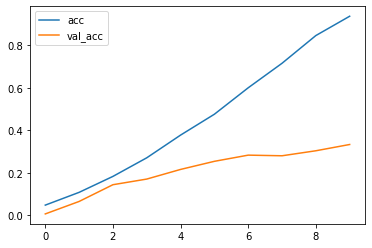

In [35]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

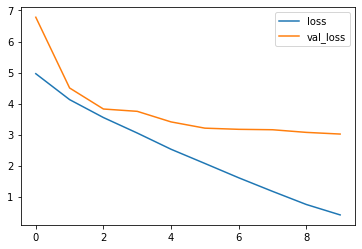

In [36]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

In [37]:
model.save('birds.h5')

In [38]:
model.save_weights('birds_weights.h5')

In [39]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32)
    image = image/255.0  # normalize to [0,1] range
    return image

In [40]:
test_img = 'Bobolink_0013_9367.jpg'
test_tensor = load_and_preprocess_image(test_img)
test_tensor = tf.expand_dims(test_tensor, axis=0)
pred = model.predict(test_tensor)

In [41]:
index_to_label.get(np.argmax(pred))

'Bobolink'